In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
from tensorflow.keras.layers import (Conv2D , MaxPooling2D , Dense ,
                              Flatten , BatchNormalization ,
                              Resizing , Rescaling , InputLayer)
from tensorflow.keras import Sequential
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.optimizers import Adam

In [ ]:
!pip install -q kaggle

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 /root/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d ashwingupta3012/male-and-female-faces-dataset

 99% 1.63G/1.63G [00:16<00:00, 111MB/s] 
100% 1.63G/1.63G [00:16<00:00, 108MB/s]


In [ ]:
!kaggle datasets download -d cashutosh/gender-classification-dataset

gender-classification-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip "/content/male-and-female-faces-dataset.zip" -d "/content/dataset_1/"

In [ ]:
!unzip "gender-classification-dataset.zip" -d "/content/dataset_1/"

In [ ]:
train_dic = '/content/dataset_1/Male and Female face dataset/'

In [ ]:
train_dic_1 = '/content/dataset_1/Training/'

In [ ]:
val_dic = '/content/dataset_1/Validation/'

In [ ]:
class_name = ['Female' , 'Male']

In [ ]:
train_data = tf.keras.utils.image_dataset_from_directory(
    train_dic,
    labels='inferred',
    label_mode='categorical',
    class_names=class_name,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
)

Found 5418 files belonging to 2 classes.


In [ ]:
train_data_1 = tf.keras.utils.image_dataset_from_directory(
    train_dic_1,
    labels='inferred',
    label_mode='categorical',
    class_names=class_name,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256),
    shuffle=True,
)

Found 47009 files belonging to 2 classes.


In [ ]:
train_data_1 = train_data
train_data_2 = train_data_1

mix_data = tf.data.Dataset.zip((train_data_1,train_data_2))

In [ ]:
test_data = tf.keras.utils.image_dataset_from_directory(
    val_dic,
    labels='inferred',
    label_mode='categorical',
    class_names=class_name,
    color_mode='rgb',
    batch_size=32,
    image_size=(256,256),
)

Found 11649 files belonging to 2 classes.


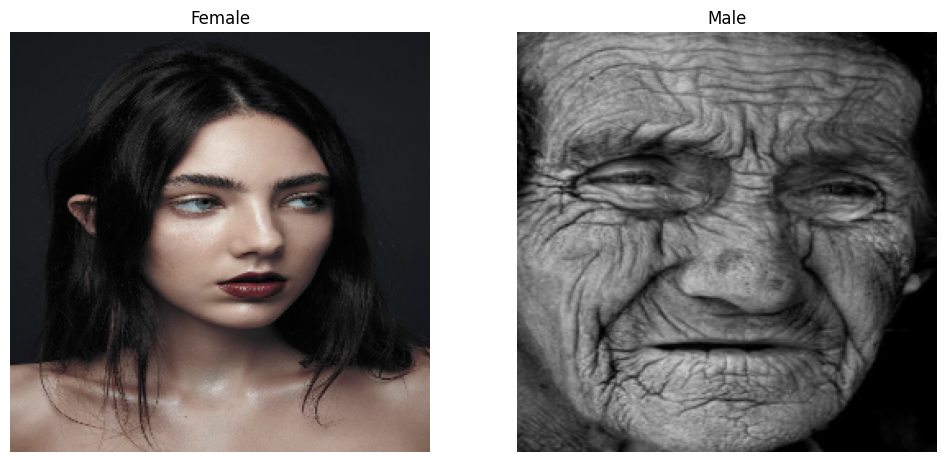

In [ ]:
plt.figure(figsize = (12,12))
for images , label in train_data.take(1):
  for i in range(2):
    ax = plt.subplot(2,2,i+1)
    plt.imshow(images[i]/255.)
    plt.title(class_name[tf.argmax(label[i],axis = 0).numpy()])
    plt.axis("off")

In [ ]:
resize_rescale_layer = Sequential([
    Resizing(256,256),
    Rescaling(1./255),
])

In [ ]:
train_data = (
    mix_data
    .prefetch(tf.data.AUTOTUNE)
)

In [ ]:
model = Sequential([
    InputLayer(input_shape = (None,None,3)),
    resize_rescale_layer,
    Conv2D(filters=6, kernel_size=3, strides=1, activation='relu'),
    BatchNormalization(),
    MaxPooling2D (pool_size = 2,strides= 2),
    Conv2D(filters = 16 , kernel_size = 3 , strides = 1 ,activation = 'relu'),
    BatchNormalization(),
    MaxPooling2D (pool_size = 2,strides= 4),
    Flatten(),
    Dense(100,activation = "relu"),
    BatchNormalization(),
    Dense(10,activation = "relu"),
    BatchNormalization(),
    Dense(2,activation = "sigmoid")
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_1 (Sequential)   (None, 256, 256, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 254, 254, 6)       168       
                                                                 
 batch_normalization (Batch  (None, 254, 254, 6)       24        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 6)       0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 16)      880       
                                                                 
 batch_normalization_1 (Bat  (None, 125, 125, 16)     

In [ ]:
loss_function = BinaryCrossentropy()

In [ ]:
model.compile(
    optimizer = Adam(learning_rate =0.01),
    loss = loss_function,
    metrics='accuracy'
)

In [ ]:
history = model.fit(train_data,epochs = 4,verbose = 1)

Epoch 1/4
170/170 [==============================] - 105s 528ms/step - loss: 0.4439 - accuracy: 0.7990
Epoch 2/4
170/170 [==============================] - 95s 519ms/step - loss: 0.1591 - accuracy: 0.9424
Epoch 3/4
170/170 [==============================] - 95s 534ms/step - loss: 0.0809 - accuracy: 0.9716
Epoch 4/4
170/170 [==============================] - 95s 534ms/step - loss: 0.0435 - accuracy: 0.9852


In [ ]:
model.evaluate(test_data)

365/365 [==============================] - 20s 55ms/step - loss: 1.8663 - accuracy: 0.5206


[1.866349220275879, 0.5206455588340759]

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
plt.plot(history.history['accuracy'])
plt.title('Model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train_accuracy'])
plt.show()

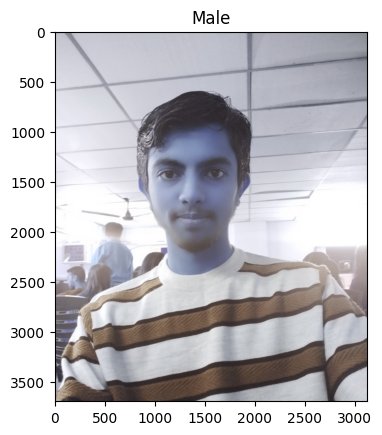

In [ ]:
pred(path = '/content/r.jpg')

In [ ]:
model.save("lenetmodel")

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp -r /content/lenetmodel /content/drive/MyDrive/lenet_colab

#check



In [ ]:
!cp -r /content/drive/MyDrive/lenet_colab /content/humangendermodel

In [ ]:
load_model = tf.keras.models.load_model('lenetmodel')

In [ ]:
class_name = ['Female' , 'Male']

In [ ]:
def pred(path):
  test_img_path = cv2.imread(path)
  test_img = tf.constant(test_img_path,dtype=tf.float32)
  test_img = tf.expand_dims(test_img,axis = 0)
  plt.imshow(test_img_path)
  plt.title(class_name[tf.argmax(model(test_img),axis = -1).numpy()[0]])

In [ ]:
image_path = '/content/j.jpg'
pred(path=image_path, premodel=load_model, class_names=class_name)
plt.show()